In [2]:
import csv
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import svm, linear_model, neighbors
from sklearn import tree, ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [3]:
#data = pd.read_csv('jaccard_neo.csv', delimiter = ',') 
#data

In [4]:
data = pd.read_csv('jaccard_neo2.csv', delimiter = ',') 
data = data.drop(columns=['Unnamed: 0','from', 'Ingredient1', 'to', 'Ingredient2', 'similarity'])
data

,URIFrom,URITo,Labeling
0,http://halal.addi.is.its.ac.id/foodproducts/Du...,http://halal.addi.is.its.ac.id/foodproducts/In...,1
1,http://halal.addi.is.its.ac.id/foodproducts/En...,http://halal.addi.is.its.ac.id/foodproducts/En...,1
2,http://halal.addi.is.its.ac.id/foodproducts/Sa...,http://halal.addi.is.its.ac.id/foodproducts/Sa...,1
3,http://halal.addi.is.its.ac.id/foodproducts/Ge...,http://halal.addi.is.its.ac.id/foodproducts/Ch...,1
4,http://halal.addi.is.its.ac.id/foodproducts/Re...,http://halal.addi.is.its.ac.id/foodproducts/Re...,1
...,...,...,...
1284817,http://halal.addi.is.its.ac.id/foodproducts/En...,http://halal.addi.is.its.ac.id/foodproducts/Ai...,0
1284818,http://halal.addi.is.its.ac.id/foodproducts/En...,http://halal.addi.is.its.ac.id/foodproducts/In...,0
1284819,http://halal.addi.is.its.ac.id/foodproducts/En...,http://halal.addi.is.its.ac.id/foodproducts/Ad...,0
1284820,http://halal.addi.is.its.ac.id/foodproducts/En...,http://halal.addi.is.its.ac.id/foodproducts/Cl...,0


In [5]:
data.groupby('Labeling').URIFrom.count()

Labeling
0    1283490
1       1332
Name: URIFrom, dtype: int64

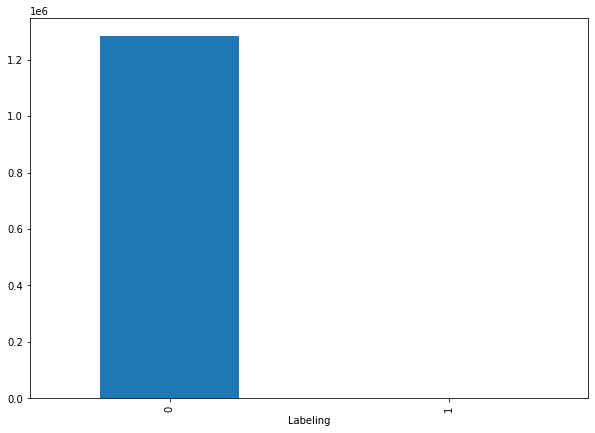

In [6]:
fig = plt.figure(figsize=(10,7))
data.groupby('Labeling').URIFrom.count().plot.bar(ylim=0)
plt.show()

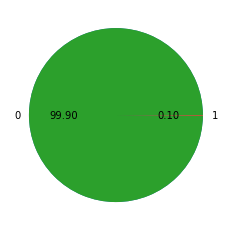

In [7]:
banding = data.groupby('Labeling').URIFrom.count()
plt.pie(banding)
labels = [0,1]
plt.pie(banding, labels=labels, autopct='%.2f')
plt.show()

In [8]:
ddi_df = data[['URIFrom','URITo']]

In [9]:
classes = data[['Labeling']]

In [10]:
vectors = 'Node2Vec 100'
vectors2 = 'RDF2Vec ready.csv'

In [11]:
# Embedding Hasil Node2Vec
embedding_df = pd.read_csv(vectors, delimiter = ',')
embedding_df
#embedding_df.to_csv('node2vec.csv')

,uri,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,http://halal.addi.is.its.ac.id/manufactures/Je...,-0.895698,-0.652424,-0.352661,0.977000,0.158936,0.748668,0.517554,0.480040,-0.693911,...,-0.962404,-0.304005,0.409442,-0.185668,0.873310,-0.663590,0.126802,-0.200655,-0.984155,-0.286988
1,http://halal.addi.is.its.ac.id/manufactures/Am...,-0.413752,-0.425428,-0.118045,-0.487334,-0.981375,0.024288,0.156467,0.573134,0.345220,...,0.044928,-0.060246,-0.716641,0.445243,0.203080,-0.022848,-0.130727,-0.369376,-0.433882,0.433699
2,http://halal.addi.is.its.ac.id/manufactures/St...,0.978251,-0.121332,0.924200,0.431506,-0.762944,0.891782,-0.375167,0.448796,-0.183074,...,0.742334,-0.152895,-0.404350,-0.758072,0.574744,0.681240,0.048268,-0.913959,-0.591921,-0.226300
3,http://halal.addi.is.its.ac.id/manufactures/Li...,-0.080296,0.476265,-0.516736,0.671542,-0.995670,-0.889545,-0.308378,-0.197450,-0.649190,...,-0.209189,-0.495756,0.512841,0.102529,-0.303258,0.411760,-0.870666,-0.420852,-0.449765,0.380749
4,http://halal.addi.is.its.ac.id/manufactures/Yi...,-0.596870,0.193437,0.035567,0.992794,-0.433264,-0.736693,0.580241,-0.682021,-0.738618,...,-0.680717,-0.380390,0.020086,0.603221,-0.175771,0.649488,-0.255825,-0.721383,-0.697301,0.991840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21234,http://halal.addi.is.its.ac.id/manufactures/Pf...,0.223399,-0.565066,0.818777,0.644069,0.507565,-0.288127,0.381643,0.460203,0.319395,...,-0.298752,0.633185,-0.741751,0.137565,-0.099919,0.117547,0.497558,0.195654,0.273953,-0.933555
21235,http://halal.addi.is.its.ac.id/manufactures/Te...,-0.090774,0.389922,0.539096,0.732077,0.215295,0.640650,-0.196415,0.773062,-0.438253,...,0.914787,-0.101291,-0.085768,0.057964,-0.560293,0.354463,0.616468,-0.286572,-0.221109,-0.947666
21236,http://halal.addi.is.its.ac.id/manufactures/By...,0.984142,0.970452,0.360086,0.820587,0.173289,0.341781,0.078333,-0.235417,0.755542,...,0.747236,-0.674036,-0.831096,0.810495,0.582437,0.592411,-0.054451,-0.315766,-0.922519,0.012182
21237,http://halal.addi.is.its.ac.id/manufactures/My...,0.805863,-0.648494,0.735636,-0.475341,0.651464,-0.005647,0.834465,0.636916,-0.669472,...,0.019946,-0.735493,0.001565,-0.103676,-0.877711,-0.001631,0.443867,0.948692,-0.448095,0.255828


In [12]:
# Embedding Hasil RDF2Vec
embedding_df2 = pd.read_csv(vectors2, delimiter = ',') 
embedding_df2 = embedding_df2.drop(columns= ['Unnamed: 0'])
embedding_df2
#embedding_df.to_csv('rdf2vec.csv')

,uri,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,http://halal.addi.is.its.ac.id/manufactures/Je...,-0.009982,-0.010785,0.001290,-0.002210,0.012950,-0.014055,-0.009258,0.002966,-0.011494,...,0.002688,0.001218,0.002677,-0.004382,0.008542,0.016461,-0.004507,-0.009144,-0.017365,-0.003578
1,http://halal.addi.is.its.ac.id/manufactures/Am...,0.001167,-0.009434,0.000645,-0.001031,0.008766,-0.000232,-0.008129,0.005552,-0.006562,...,0.003313,0.004367,0.006992,-0.005176,-0.003665,0.001302,-0.007643,-0.004331,-0.007680,0.000269
2,http://halal.addi.is.its.ac.id/manufactures/St...,-0.002369,-0.013097,0.002923,-0.011869,0.007506,-0.008881,-0.008147,0.002153,-0.007135,...,0.009371,0.006710,0.008013,-0.005424,0.010427,0.012458,-0.009169,-0.003693,-0.007440,-0.002895
3,http://halal.addi.is.its.ac.id/manufactures/Li...,-0.001649,-0.005344,-0.003339,-0.005358,-0.001656,0.002563,-0.005313,-0.002229,0.001380,...,-0.000795,-0.000445,0.003015,0.000822,-0.003762,0.007071,-0.006090,0.000607,0.000325,0.000925
4,http://halal.addi.is.its.ac.id/manufactures/Yi...,0.002971,-0.004289,-0.001187,-0.002908,0.000447,-0.001315,-0.005677,-0.002215,-0.003805,...,0.005115,0.004029,-0.003079,-0.003695,-0.002872,0.003256,-0.002444,-0.001074,-0.000400,-0.003808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21232,http://halal.addi.is.its.ac.id/manufactures/Pf...,-0.015791,-0.016935,0.000231,-0.002209,0.015589,-0.019267,-0.013298,0.003206,-0.012608,...,0.008705,0.009454,0.003483,-0.006225,0.009099,0.015249,-0.013845,-0.000098,-0.022265,0.001284
21233,http://halal.addi.is.its.ac.id/manufactures/Te...,0.004632,-0.003782,0.004087,-0.002548,0.013088,-0.005177,-0.008472,-0.003216,-0.009668,...,0.012949,0.012496,-0.000363,-0.004499,0.002768,0.005954,-0.015915,-0.008941,-0.008630,-0.004899
21234,http://halal.addi.is.its.ac.id/manufactures/By...,0.004317,-0.004459,0.001513,-0.001362,0.008050,-0.010236,-0.001776,-0.002006,-0.006190,...,0.009008,0.004254,-0.003833,-0.006258,-0.000842,0.011535,-0.012161,-0.005507,-0.001593,-0.000905
21235,http://halal.addi.is.its.ac.id/manufactures/My...,-0.003378,-0.014259,0.000830,-0.001121,0.007841,-0.007457,-0.013431,0.004210,-0.013931,...,0.008928,-0.000022,-0.002112,-0.002604,0.004747,0.009997,-0.007762,-0.016962,-0.007368,-0.003753


## Single Model

In [13]:
merge1 = data.merge(embedding_df, left_on='URIFrom', right_on='uri').merge(embedding_df, left_on='URITo', right_on='uri')
merge1 = merge1.drop(columns=['URIFrom', 'URITo', 'uri_x', 'uri_y'])
merge2 = data.merge(embedding_df2, left_on='URIFrom', right_on='uri').merge(embedding_df2, left_on='URITo', right_on='uri')
merge2 = merge2.drop(columns=['URIFrom', 'URITo', 'uri_x', 'uri_y'])

In [14]:
merge1

,Labeling,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,91_y,92_y,93_y,94_y,95_y,96_y,97_y,98_y,99_y,100_y
0,1,-0.702162,-0.644228,-0.767668,0.035389,-0.858089,-0.472290,0.064183,-0.151259,0.150700,...,0.821805,-0.199322,0.483569,0.359144,0.040795,0.888477,0.176423,0.002609,-0.891409,0.205391
1,0,-0.470965,0.172671,0.725902,0.471167,-0.896934,0.873560,-0.533920,0.128320,-0.029754,...,0.821805,-0.199322,0.483569,0.359144,0.040795,0.888477,0.176423,0.002609,-0.891409,0.205391
2,0,0.021881,0.607069,-0.516492,-0.865557,-0.078580,-0.194024,-0.996002,0.901389,0.755355,...,0.821805,-0.199322,0.483569,0.359144,0.040795,0.888477,0.176423,0.002609,-0.891409,0.205391
3,0,-0.614335,0.902126,0.126998,0.232395,-0.659679,0.784474,-0.916558,-0.571246,0.649799,...,0.821805,-0.199322,0.483569,0.359144,0.040795,0.888477,0.176423,0.002609,-0.891409,0.205391
4,0,-0.130539,0.417967,0.106355,0.693106,0.626931,-0.746763,-0.595157,-0.170845,-0.039102,...,0.821805,-0.199322,0.483569,0.359144,0.040795,0.888477,0.176423,0.002609,-0.891409,0.205391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284817,0,0.275532,-0.636493,0.461502,-0.705234,-0.435801,-0.020532,0.890056,0.982835,0.135627,...,-0.118412,-0.053654,-0.230298,0.400629,-0.034700,0.989183,-0.175710,0.810372,0.751791,0.270028
1284818,0,0.085827,0.411739,0.045779,-0.508399,-0.449099,0.587044,0.081373,0.976098,-0.805346,...,-0.118412,-0.053654,-0.230298,0.400629,-0.034700,0.989183,-0.175710,0.810372,0.751791,0.270028
1284819,0,0.931260,0.011991,0.037045,0.323726,-0.554913,-0.830184,-0.143044,0.067267,0.739429,...,-0.118412,-0.053654,-0.230298,0.400629,-0.034700,0.989183,-0.175710,0.810372,0.751791,0.270028
1284820,0,-0.692618,0.796701,-0.700307,0.757550,-0.215853,0.738217,0.592107,-0.391838,0.422672,...,-0.118412,-0.053654,-0.230298,0.400629,-0.034700,0.989183,-0.175710,0.810372,0.751791,0.270028


In [15]:
merge2

,Labeling,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,91_y,92_y,93_y,94_y,95_y,96_y,97_y,98_y,99_y,100_y
0,1,-0.017210,-0.013685,0.004993,0.002480,0.024786,-0.022033,-0.006357,0.001697,-0.011737,...,0.019124,0.003920,0.006782,-0.014937,0.020251,0.018333,-0.019210,-0.021128,-0.027098,-0.004905
1,0,-0.010796,-0.018893,0.009393,-0.001983,0.018070,-0.022489,-0.003451,0.010421,-0.020835,...,0.019124,0.003920,0.006782,-0.014937,0.020251,0.018333,-0.019210,-0.021128,-0.027098,-0.004905
2,0,-0.005455,-0.024692,0.009152,-0.006343,0.018481,-0.029505,-0.014132,0.000600,-0.020548,...,0.019124,0.003920,0.006782,-0.014937,0.020251,0.018333,-0.019210,-0.021128,-0.027098,-0.004905
3,0,-0.019731,-0.023373,0.013772,0.003173,0.033291,-0.038385,-0.008225,0.002498,-0.020025,...,0.019124,0.003920,0.006782,-0.014937,0.020251,0.018333,-0.019210,-0.021128,-0.027098,-0.004905
4,0,-0.011015,-0.025090,0.011540,0.000108,0.028345,-0.033599,-0.012663,-0.001039,-0.019169,...,0.019124,0.003920,0.006782,-0.014937,0.020251,0.018333,-0.019210,-0.021128,-0.027098,-0.004905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284817,0,-0.017953,-0.022779,0.009504,-0.000970,0.030641,-0.038790,-0.024275,0.003036,-0.024647,...,0.002267,-0.000194,-0.003394,0.000661,0.015740,0.009918,-0.000988,-0.010598,-0.021549,-0.001589
1284818,0,-0.007845,-0.027959,0.007701,-0.017255,0.028187,-0.019206,-0.031905,0.001746,-0.019890,...,0.002267,-0.000194,-0.003394,0.000661,0.015740,0.009918,-0.000988,-0.010598,-0.021549,-0.001589
1284819,0,-0.012692,-0.028486,0.009668,-0.000361,0.022077,-0.026975,-0.016288,0.006425,-0.022212,...,0.002267,-0.000194,-0.003394,0.000661,0.015740,0.009918,-0.000988,-0.010598,-0.021549,-0.001589
1284820,0,-0.014225,-0.039066,0.010019,-0.007191,0.025184,-0.029413,-0.027430,-0.003452,-0.029610,...,0.002267,-0.000194,-0.003394,0.000661,0.015740,0.009918,-0.000988,-0.010598,-0.021549,-0.001589


In [16]:
X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling'] 

In [17]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 1283490, 1: 1332})


In [18]:
# transform the dataset
over = SMOTE(sampling_strategy=0.002)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X, y = pipeline.fit_resample(X, y)

In [19]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 2566, 1: 2566})


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

In [21]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_jobs = -1,  
                           max_depth = 110, min_samples_leaf = 1,
                           min_samples_split = 2, n_estimators = 200, criterion='gini')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

In [22]:
#Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score",metrics.f1_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test, y_pred))
print("Recall",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7935064935064935
F1 Score 0.7860026917900403
Precision 0.8077455048409405
Recall 0.765399737876802


In [23]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[638, 139],
       [179, 584]], dtype=int64)

In [24]:
#X_test.to_csv('X_test2.csv', index=True)

In [25]:
#df = pd.DataFrame(y_pred)
#df.to_csv('y_pred2.csv', index=True)

## Automated

### Sumber Semua Data

In [26]:
merge1 = data.merge(embedding_df, left_on='URIFrom', right_on='uri').merge(embedding_df, left_on='URITo', right_on='uri')
merge1 = merge1.drop(columns=['URIFrom', 'URITo', 'uri_x', 'uri_y'])
merge2 = data.merge(embedding_df2, left_on='URIFrom', right_on='uri').merge(embedding_df2, left_on='URITo', right_on='uri')
merge2 = merge2.drop(columns=['URIFrom', 'URITo', 'uri_x', 'uri_y'])

### Node2Vec

In [27]:
#Node2Vec
RF = RandomForestClassifier()
NB = GaussianNB()
SVM = svm.SVC()
LR = linear_model.LogisticRegression()
GBT = ensemble.GradientBoostingClassifier()

ss = 1, 0.5, 0.33
train_size = [0.7]
clf = [RF]
#, NB, SVM, LR, GBT
for clfs in clf :
    for s in ss:
        X = merge1.loc[:, merge1.columns != 'Labeling']
        y = merge1.loc[:, merge1.columns == 'Labeling']
        y=y['Labeling'] 
        
        over = SMOTE(sampling_strategy=0.002)
        under = RandomUnderSampler(sampling_strategy=s)
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)
        
        X, y = pipeline.fit_resample(X, y)
        for f in train_size :
        
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
            clfs.fit(X_train, y_train)
            #score_test = rf.score(X_test, y_test)
            predict = clfs.predict(X_test)
            score_test1 = metrics.f1_score(y_test, predict)
            print("F1-Score Random Forest with Train size %.2f : %.3f%%" % (f, score_test1*100))
    
            score_test2 = metrics.accuracy_score(y_test, predict)
            print("Accuracy Random Forest with Train size %.2f : %.3f%%" % (f, score_test2*100))
        
            score_test3 = metrics.precision_score(y_test, predict)
            print("Precision Random Forest with Train size %.2f : %.3f%%" % (f, score_test3*100))
     
            score_test4 = metrics.recall_score(y_test, predict)
            print("Recall Random Forest with Train size %.2f : %.3f%%" % (f, score_test4*100))

F1-Score Random Forest with Train size 0.70 : 81.486%
Accuracy Random Forest with Train size 0.70 : 82.208%
Precision Random Forest with Train size 0.70 : 84.100%
Recall Random Forest with Train size 0.70 : 79.030%
F1-Score Random Forest with Train size 0.70 : 72.466%
Accuracy Random Forest with Train size 0.70 : 85.065%
Precision Random Forest with Train size 0.70 : 91.532%
Recall Random Forest with Train size 0.70 : 59.974%
F1-Score Random Forest with Train size 0.70 : 60.823%
Accuracy Random Forest with Train size 0.70 : 85.885%
Precision Random Forest with Train size 0.70 : 94.708%
Recall Random Forest with Train size 0.70 : 44.796%


### RDF2Vec

In [28]:
#RDF2Vec
RF = RandomForestClassifier()
NB = GaussianNB()
SVM = svm.SVC()
LR = linear_model.LogisticRegression()
GBT = ensemble.GradientBoostingClassifier()

ss = 1, 0.5, 0.33
train_size = [0.7]
clf = [RF]
#, NB, SVM, LR, GBT
for clfs in clf :
    for s in ss:
        X = merge2.loc[:, merge2.columns != 'Labeling']
        y = merge2.loc[:, merge2.columns == 'Labeling']
        y=y['Labeling'] 
        
        over = SMOTE(sampling_strategy=0.002)
        under = RandomUnderSampler(sampling_strategy=s)
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)
        
        X, y = pipeline.fit_resample(X, y)
        for f in train_size :
        
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
            clfs.fit(X_train, y_train)
            #score_test = rf.score(X_test, y_test)
            predict = clfs.predict(X_test)
            score_test1 = metrics.f1_score(y_test, predict)
            print("F1-Score Random Forest with Train size %.2f : %.3f%%" % (f, score_test1*100))
    
            score_test2 = metrics.accuracy_score(y_test, predict)
            print("Accuracy Random Forest with Train size %.2f : %.3f%%" % (f, score_test2*100))
        
            score_test3 = metrics.precision_score(y_test, predict)
            print("Precision Random Forest with Train size %.2f : %.3f%%" % (f, score_test3*100))
     
            score_test4 = metrics.recall_score(y_test, predict)
            print("Recall Random Forest with Train size %.2f : %.3f%%" % (f, score_test4*100))

F1-Score Random Forest with Train size 0.70 : 80.292%
Accuracy Random Forest with Train size 0.70 : 80.714%
Precision Random Forest with Train size 0.70 : 81.317%
Recall Random Forest with Train size 0.70 : 79.292%
F1-Score Random Forest with Train size 0.70 : 69.287%
Accuracy Random Forest with Train size 0.70 : 83.766%
Precision Random Forest with Train size 0.70 : 91.164%
Recall Random Forest with Train size 0.70 : 55.878%
F1-Score Random Forest with Train size 0.70 : 58.514%
Accuracy Random Forest with Train size 0.70 : 85.240%
Precision Random Forest with Train size 0.70 : 93.623%
Recall Random Forest with Train size 0.70 : 42.556%


## Cross Validation Menggunakan KFold

In [47]:
X = merge1.loc[:, merge1.columns != 'Labeling']
y = merge1.loc[:, merge1.columns == 'Labeling']
y=y['Labeling'] 
        
over = SMOTE(sampling_strategy=0.002)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

#Node2Vec
RF = RandomForestClassifier()
NB = GaussianNB()
LR = linear_model.LogisticRegression()
GBT = ensemble.GradientBoostingClassifier()

ss = 1, 0.5, 0.33
train_size = [0.8, 0.75, 0.7, 0.6]
clf = [RF]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#, NB, SVM, LR, GBT
for clfs in clf :
    for f in train_size :
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
        clfs.fit(X_train, y_train)
        #score_test = rf.score(X_test, y_test)
        predict = clfs.predict(X_test)
        score_test = metrics.f1_score(y_test, predict)
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1"))

[0.82317682 0.82251082 0.82621648 0.82024793 0.82587065]
[0.82690406 0.81615303 0.81934847 0.82377049 0.83448959]
[0.828      0.82290562 0.8278607  0.81873727 0.83283877]
[0.82364729 0.82875264 0.81299213 0.82815735 0.82751745]


In [48]:
#Node2Vec
RF = RandomForestClassifier(n_jobs = -1,  
                           max_depth = 80, min_samples_leaf = 1,
                           min_samples_split = 2, n_estimators = 1000, criterion='gini')
NB = GaussianNB()
LR = linear_model.LogisticRegression()
GBT = ensemble.GradientBoostingClassifier()

ss = 1, 0.5, 0.33
train_size = [0.8, 0.75, 0.7, 0.6]
clf = [RF]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#, NB, SVM, LR, GBT
for clfs in clf :
    for f in train_size :
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
        clfs.fit(X_train, y_train)
        #score_test = rf.score(X_test, y_test)
        predict = clfs.predict(X_test)
        score_test = metrics.f1_score(y_test, predict)
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1"))

[0.84284284 0.82905983 0.83166333 0.82666667 0.83283283]
[0.83632735 0.83671291 0.82751745 0.82510288 0.83716284]
[0.83383085 0.83103082 0.82834331 0.81940144 0.83650953]
[0.82634731 0.8343949  0.82917083 0.83057851 0.83832335]


In [49]:
X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling'] 
        
over = SMOTE(sampling_strategy=0.002)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

#RDF2Vec
RF = RandomForestClassifier()
NB = GaussianNB()
LR = linear_model.LogisticRegression()
GBT = ensemble.GradientBoostingClassifier()

ss = 1, 0.5, 0.33
train_size = [0.8, 0.75, 0.7, 0.6]
clf = [RF]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#, NB, SVM, LR, GBT
for clfs in clf :
    for f in train_size :
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
        clfs.fit(X_train, y_train)
        #score_test = rf.score(X_test, y_test)
        predict = clfs.predict(X_test)
        score_test = metrics.f1_score(y_test, predict)
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1"))

[0.79882812 0.79324895 0.81117534 0.77567298 0.7961165 ]
[0.79765396 0.78646934 0.80851064 0.79919679 0.77692308]
[0.79174853 0.78361345 0.80660836 0.80842528 0.78599222]
[0.80078508 0.78306878 0.81329423 0.8        0.78927203]


In [50]:
#RDF2Vec
RF = RandomForestClassifier(n_jobs = -1,  
                           max_depth = 90, min_samples_leaf = 1,
                           min_samples_split = 2, n_estimators = 1000, criterion='entropy')
NB = GaussianNB()
LR = linear_model.LogisticRegression()
GBT = ensemble.GradientBoostingClassifier()

ss = 1, 0.5, 0.33
train_size = [0.8, 0.75, 0.7, 0.6]
clf = [RF]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#, NB, SVM, LR, GBT
for clfs in clf :
    for f in train_size :
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
        clfs.fit(X_train, y_train)
        #score_test = rf.score(X_test, y_test)
        predict = clfs.predict(X_test)
        score_test = metrics.f1_score(y_test, predict)
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1"))

[0.80772947 0.8        0.82490272 0.79920477 0.79307026]
[0.79651163 0.80082988 0.82318841 0.80360721 0.78741659]
[0.7972973  0.80621762 0.81774349 0.80159521 0.80457579]
[0.79805825 0.79958246 0.82250242 0.8019802  0.80422265]


### Node2Vec

In [35]:
#Node2Vec
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = merge1.loc[:, merge1.columns != 'Labeling']
y = merge1.loc[:, merge1.columns == 'Labeling']
y=y['Labeling'] 
        
over = SMOTE(sampling_strategy=0.002)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

RF = RandomForestClassifier(n_jobs = -1,  
                           max_depth = 80, min_samples_leaf = 1,
                           min_samples_split = 2, n_estimators = 1000, criterion='gini')

In [36]:
kFold = 5
print(cross_val_score(RF, X, y, cv=kfold, scoring="accuracy"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="accuracy").mean())
print(cross_val_score(RF, X, y, cv=kfold, scoring="precision"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="precision").mean())
print(cross_val_score(RF, X, y, cv=kfold, scoring="recall"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="recall").mean())
print(cross_val_score(RF, X, y, cv=kfold, scoring="f1"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="f1").mean())

[0.84810127 0.84712756 0.8411306  0.82358674 0.82651072]
0.8347585939857758
[0.87763713 0.85365854 0.89721627 0.85430464 0.88235294]
0.8726750090777061
[0.80270793 0.79874214 0.77819549 0.77309237 0.76568266]
0.7895499929398565
[0.83683684 0.83315393 0.83683684 0.818468   0.82608696]
0.8271259938809011


### RDF2Vec

In [49]:
#RDF2Vec
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling'] 
        
over = SMOTE(sampling_strategy=0.002)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

RF = RandomForestClassifier(n_jobs = -1,  
                           max_depth = 90, min_samples_leaf = 1,
                           min_samples_split = 2, n_estimators = 1000, criterion='entropy')

In [50]:
print(cross_val_score(RF, X, y, cv=kfold, scoring="accuracy"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="accuracy").mean())
print(cross_val_score(RF, X, y, cv=kfold, scoring="precision"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="precision").mean())
print(cross_val_score(RF, X, y, cv=kfold, scoring="recall"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="recall").mean())
print(cross_val_score(RF, X, y, cv=kfold, scoring="f1"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="f1").mean())

[0.80136319 0.81304771 0.79337232 0.80311891 0.7962963 ]
0.8002706647610045
[0.79213483 0.78884462 0.82306163 0.79681275 0.83435583]
0.8052386858156402
[0.81818182 0.82809224 0.77067669 0.80923695 0.75461255]
0.7978953026698686
[0.80266921 0.80408163 0.79883382 0.7952048  0.80116959]
0.797718406626808


## Perbandingan Dengan Algoritma Machine Learning Lain

### Node2Vec

In [35]:
# Node2Vec
X = merge1.loc[:, merge1.columns != 'Labeling']
y = merge1.loc[:, merge1.columns == 'Labeling']
y=y['Labeling'] 
        
over = SMOTE(sampling_strategy=0.002)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
# Membandingkan Decision Tree dengan berbagai train size
RF = RandomForestClassifier(n_jobs = -1,  
                           max_depth = 80, min_samples_leaf = 1,
                           min_samples_split = 2, n_estimators = 1000, criterion='gini')
NB = GaussianNB()
LR = linear_model.LogisticRegression()
GBT = ensemble.GradientBoostingClassifier()

train_size = [0.7]
rforest = [RF, NB, LR, GBT]
for rf in rforest :
  for f in train_size :
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
    rf.fit(X_train, y_train)
    #score_test = rf.score(X_test, y_test)
    predict = rf.predict(X_test)
    score_test1 = metrics.f1_score(y_test, predict)
    if rf == RF: print("F1-Score Random Forest with Train size %.2f : %.3f%%" % (f, score_test1*100))
    if rf == NB: print("F1-Score NB with Train size %.2f : %.3f%%" % (f, score_test1*100))
    if rf == LR: print("F1-Score LR with Train size %.2f : %.3f%%" % (f, score_test1*100))
    if rf == GBT: print("F1-Score GBT with Train size %.2f : %.3f%%" % (f, score_test1*100))
    
    score_test2 = metrics.accuracy_score(y_test, predict)
    if rf == RF: print("Accuracy Random Forest with Train size %.2f : %.3f%%" % (f, score_test2*100))
    if rf == NB: print("Accuracy NB with Train size %.2f : %.3f%%" % (f, score_test2*100))
    if rf == LR: print("Accuracy LR with Train size %.2f : %.3f%%" % (f, score_test2*100))
    if rf == GBT: print("Accuracy GBT with Train size %.2f : %.3f%%" % (f, score_test2*100))
        
    score_test3 = metrics.precision_score(y_test, predict)
    if rf == RF: print("Precision Random Forest with Train size %.2f : %.3f%%" % (f, score_test3*100))
    if rf == NB: print("Precision NB with Train size %.2f : %.3f%%" % (f, score_test3*100))
    if rf == LR: print("Precision LR with Train size %.2f : %.3f%%" % (f, score_test3*100))
    if rf == GBT: print("Precision GBT with Train size %.2f : %.3f%%" % (f, score_test3*100))
     
    score_test4 = metrics.recall_score(y_test, predict)
    if rf == RF: print("Recall Random Forest with Train size %.2f : %.3f%%" % (f, score_test4*100))
    if rf == NB: print("Recall NB with Train size %.2f : %.3f%%" % (f, score_test4*100))
    if rf == LR: print("Recall LR with Train size %.2f : %.3f%%" % (f, score_test4*100))
    if rf == GBT: print("Recall GBT with Train size %.2f : %.3f%%" % (f, score_test4*100))

F1-Score Random Forest with Train size 0.70 : 81.335%
Accuracy Random Forest with Train size 0.70 : 82.208%
Precision Random Forest with Train size 0.70 : 84.681%
Recall Random Forest with Train size 0.70 : 78.244%
F1-Score NB with Train size 0.70 : 67.172%
Accuracy NB with Train size 0.70 : 69.091%
Precision NB with Train size 0.70 : 70.888%
Recall NB with Train size 0.70 : 63.827%
F1-Score LR with Train size 0.70 : 58.275%
Accuracy LR with Train size 0.70 : 57.597%
Precision LR with Train size 0.70 : 56.858%
Recall LR with Train size 0.70 : 59.764%
F1-Score GBT with Train size 0.70 : 74.181%
Accuracy GBT with Train size 0.70 : 73.377%
Precision GBT with Train size 0.70 : 71.394%
Recall GBT with Train size 0.70 : 77.195%


In [36]:
rf_probs1 = RF.predict_proba(X_test)
rf_probs1 = rf_probs1[:, 1]
nb_probs1 = NB.predict_proba(X_test)
nb_probs1 = nb_probs1[:, 1]
lr_probs1 = LR.predict_proba(X_test)
lr_probs1 = lr_probs1[:, 1]
gbt_probs1 = GBT.predict_proba(X_test)
gbt_probs1 = gbt_probs1[:, 1]

In [37]:
rf_auc1 = roc_auc_score(y_test,rf_probs1)
nb_auc1 = roc_auc_score(y_test,nb_probs1)
lr_auc1 = roc_auc_score(y_test,lr_probs1)
gbt_auc1 = roc_auc_score(y_test,gbt_probs1)
print('Random Forest = %.3f' % (rf_auc1))
print('Naive Bayes = %.3f' % (nb_auc1))
print('Logistic Regressio = %.3f' % (lr_auc1))
print('Gradient Boosting = %.3f' % (gbt_auc1))

Random Forest = 0.873
Naive Bayes = 0.751
Logistic Regressio = 0.604
Gradient Boosting = 0.813


In [38]:
rf_rpr1, rf_tpr1, _ = roc_curve(y_test, rf_probs1)
nb_rpr1, nb_tpr1, _ = roc_curve(y_test, nb_probs1)
lr_rpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)
gbt_rpr1, gbt_tpr1, _ = roc_curve(y_test, gbt_probs1)

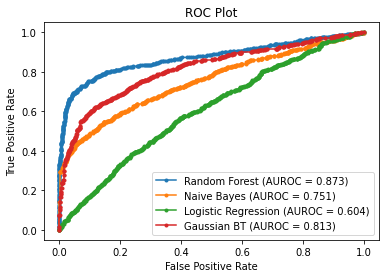

In [39]:
plt.plot(rf_rpr1, rf_tpr1, marker= '.', label = 'Random Forest (AUROC = %0.3f)' % rf_auc1)
plt.plot(nb_rpr1, nb_tpr1, marker= '.', label = 'Naive Bayes (AUROC = %0.3f)' % nb_auc1)
plt.plot(lr_rpr1, lr_tpr1, marker= '.', label = 'Logistic Regression (AUROC = %0.3f)' % lr_auc1)
plt.plot(gbt_rpr1, gbt_tpr1, marker= '.', label = 'Gaussian BT (AUROC = %0.3f)' % gbt_auc1)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### RDF2Vec

In [29]:
# RDF2Vec
X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling'] 
        
over = SMOTE(sampling_strategy=0.002)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
# Membandingkan Decision Tree dengan berbagai train size
RF = RandomForestClassifier(n_jobs = -1,  
                           max_depth = 90, min_samples_leaf = 1,
                           min_samples_split = 2, n_estimators = 1000, criterion='entropy')
NB = GaussianNB()
LR = linear_model.LogisticRegression()
GBT = ensemble.GradientBoostingClassifier()

train_size = [0.7]
rforest = [RF, NB, LR, GBT]
for rf in rforest :
  for f in train_size :
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
    rf.fit(X_train, y_train)
    #score_test = rf.score(X_test, y_test)
    predict = rf.predict(X_test)
    score_test1 = metrics.f1_score(y_test, predict)
    if rf == RF: print("F1-Score Random Forest with Train size %.2f : %.3f%%" % (f, score_test1*100))
    if rf == NB: print("F1-Score NB with Train size %.2f : %.3f%%" % (f, score_test1*100))
    if rf == LR: print("F1-Score LR with Train size %.2f : %.3f%%" % (f, score_test1*100))
    if rf == GBT: print("F1-Score GBT with Train size %.2f : %.3f%%" % (f, score_test1*100))
    
    score_test2 = metrics.accuracy_score(y_test, predict)
    if rf == RF: print("Accuracy Random Forest with Train size %.2f : %.3f%%" % (f, score_test2*100))
    if rf == NB: print("Accuracy NB with Train size %.2f : %.3f%%" % (f, score_test2*100))
    if rf == LR: print("Accuracy LR with Train size %.2f : %.3f%%" % (f, score_test2*100))
    if rf == GBT: print("Accuracy GBT with Train size %.2f : %.3f%%" % (f, score_test2*100))
        
    score_test3 = metrics.precision_score(y_test, predict)
    if rf == RF: print("Precision Random Forest with Train size %.2f : %.3f%%" % (f, score_test3*100))
    if rf == NB: print("Precision NB with Train size %.2f : %.3f%%" % (f, score_test3*100))
    if rf == LR: print("Precision LR with Train size %.2f : %.3f%%" % (f, score_test3*100))
    if rf == GBT: print("Precision GBT with Train size %.2f : %.3f%%" % (f, score_test3*100))
     
    score_test4 = metrics.recall_score(y_test, predict)
    if rf == RF: print("Recall Random Forest with Train size %.2f : %.3f%%" % (f, score_test4*100))
    if rf == NB: print("Recall NB with Train size %.2f : %.3f%%" % (f, score_test4*100))
    if rf == LR: print("Recall LR with Train size %.2f : %.3f%%" % (f, score_test4*100))
    if rf == GBT: print("Recall GBT with Train size %.2f : %.3f%%" % (f, score_test4*100))

F1-Score Random Forest with Train size 0.70 : 80.990%
Accuracy Random Forest with Train size 0.70 : 81.039%
Precision Random Forest with Train size 0.70 : 80.466%
Recall Random Forest with Train size 0.70 : 81.520%
F1-Score NB with Train size 0.70 : 58.942%
Accuracy NB with Train size 0.70 : 55.130%
Precision NB with Train size 0.70 : 53.913%
Recall NB with Train size 0.70 : 65.007%
F1-Score LR with Train size 0.70 : 55.502%
Accuracy LR with Train size 0.70 : 52.208%
Precision LR with Train size 0.70 : 51.515%
Recall LR with Train size 0.70 : 60.157%
F1-Score GBT with Train size 0.70 : 73.262%
Accuracy GBT with Train size 0.70 : 72.273%
Precision GBT with Train size 0.70 : 70.144%
Recall GBT with Train size 0.70 : 76.671%


In [30]:
rf_probs2 = RF.predict_proba(X_test)
rf_probs2 = rf_probs2[:, 1]
nb_probs2 = NB.predict_proba(X_test)
nb_probs2 = nb_probs2[:, 1]
lr_probs2 = LR.predict_proba(X_test)
lr_probs2 = lr_probs2[:, 1]
gbt_probs2 = GBT.predict_proba(X_test)
gbt_probs2 = gbt_probs2[:, 1]

In [31]:
rf_auc2 = roc_auc_score(y_test,rf_probs2)
nb_auc2 = roc_auc_score(y_test,nb_probs2)
lr_auc2 = roc_auc_score(y_test,lr_probs2)
gbt_auc2 = roc_auc_score(y_test,gbt_probs2)
print('Random Forest = %.3f' % (rf_auc2))
print('Naive Bayes = %.3f' % (nb_auc2))
print('Logistic Regressio = %.3f' % (lr_auc2))
print('Gradient Boosting = %.3f' % (gbt_auc2))

Random Forest = 0.880
Naive Bayes = 0.579
Logistic Regressio = 0.544
Gradient Boosting = 0.789


In [32]:
rf_rpr2, rf_tpr2, _ = roc_curve(y_test, rf_probs2)
nb_rpr2, nb_tpr2, _ = roc_curve(y_test, nb_probs2)
lr_rpr2, lr_tpr2, _ = roc_curve(y_test, lr_probs2)
gbt_rpr2, gbt_tpr2, _ = roc_curve(y_test, gbt_probs2)

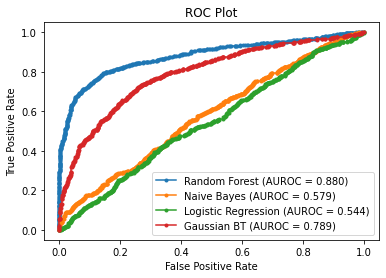

In [33]:
plt.plot(rf_rpr2, rf_tpr2, marker= '.', label = 'Random Forest (AUROC = %0.3f)' % rf_auc2)
plt.plot(nb_rpr2, nb_tpr2, marker= '.', label = 'Naive Bayes (AUROC = %0.3f)' % nb_auc2)
plt.plot(lr_rpr2, lr_tpr2, marker= '.', label = 'Logistic Regression (AUROC = %0.3f)' % lr_auc2)
plt.plot(gbt_rpr2, gbt_tpr2, marker= '.', label = 'Gaussian BT (AUROC = %0.3f)' % gbt_auc2)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

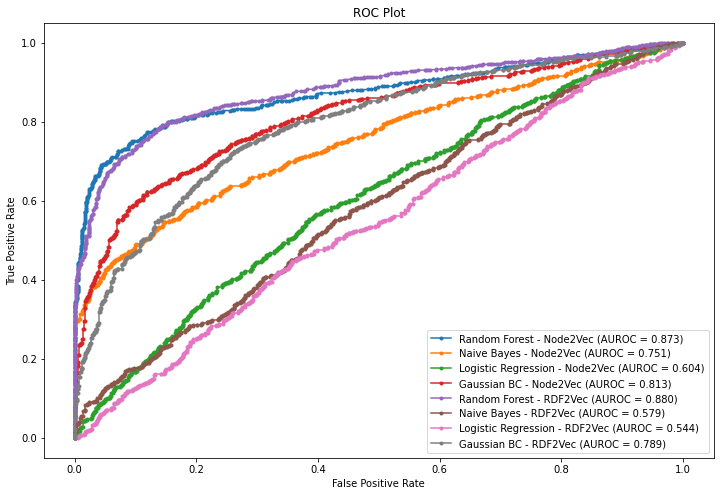

In [40]:
plt.figure(figsize=(12, 8))
plt.plot(rf_rpr1, rf_tpr1, marker= '.', label = 'Random Forest - Node2Vec (AUROC = %0.3f)' % rf_auc1)
plt.plot(nb_rpr1, nb_tpr1, marker= '.', label = 'Naive Bayes - Node2Vec (AUROC = %0.3f)' % nb_auc1)
plt.plot(lr_rpr1, lr_tpr1, marker= '.', label = 'Logistic Regression - Node2Vec (AUROC = %0.3f)' % lr_auc1)
plt.plot(gbt_rpr1, gbt_tpr1, marker= '.', label = 'Gaussian BC - Node2Vec (AUROC = %0.3f)' % gbt_auc1)
plt.plot(rf_rpr2, rf_tpr2, marker= '.', label = 'Random Forest - RDF2Vec (AUROC = %0.3f)' % rf_auc2)
plt.plot(nb_rpr2, nb_tpr2, marker= '.', label = 'Naive Bayes - RDF2Vec (AUROC = %0.3f)' % nb_auc2)
plt.plot(lr_rpr2, lr_tpr2, marker= '.', label = 'Logistic Regression - RDF2Vec (AUROC = %0.3f)' % lr_auc2)
plt.plot(gbt_rpr2, gbt_tpr2, marker= '.', label = 'Gaussian BC - RDF2Vec (AUROC = %0.3f)' % gbt_auc2)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Hyperparameter Tuning

### Node2Vec

In [24]:
X = merge1.loc[:, merge1.columns != 'Labeling']
y = merge1.loc[:, merge1.columns == 'Labeling']
y=y['Labeling'] 
    
over = SMOTE(sampling_strategy=0.002)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [80, 90, 100, 110, None],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 4, 6, 8, 10],
    'n_estimators': [100, 200, 400, 1000],
    'criterion': ['gini', 'entropy']
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='f1',
                          cv = 5, n_jobs = -1)

In [25]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 80,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [36]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

import numpy as np
from sklearn.model_selection import KFold

X = merge1.loc[:, merge1.columns != 'Labeling']
y = merge1.loc[:, merge1.columns == 'Labeling']
y=y['Labeling'] 
    
over = SMOTE(sampling_strategy=0.002)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(n_jobs = -1,  
                           max_depth = 80, min_samples_leaf = 1,
                           min_samples_split = 2, n_estimators = 1000, criterion='gini')
rf.fit(X_train, y_train)
            
predict = rf.predict(X_test)

from sklearn.model_selection import cross_val_score
score_test = metrics.f1_score(y_test, predict)
print(cross_val_score(RF, X, y, cv=kfold, scoring="f1").mean())

0.8135089842439823


In [37]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

import numpy as np
from sklearn.model_selection import KFold

X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling'] 
    
over = SMOTE(sampling_strategy=0.002)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(n_jobs = -1,  
                           max_depth = 80, min_samples_leaf = 1,
                           min_samples_split = 2, n_estimators = 1000, criterion='gini')
rf.fit(X_train, y_train)
            
predict = rf.predict(X_test)

from sklearn.model_selection import cross_val_score
print(cross_val_score(rf, X, y, cv=kfold, scoring="f1").mean())

0.8063377168668981


### RDF2Vec

In [62]:
X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling'] 
    
over = SMOTE(sampling_strategy=0.0025)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [80, 90, 100, 110, None],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 4, 6, 8, 10],
    'n_estimators': [100, 200, 400, 1000],
    'criterion': ['gini', 'entropy']
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='f1',
                          cv = 5, n_jobs = -1)

In [63]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 90,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [64]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = merge1.loc[:, merge1.columns != 'Labeling']
y = merge1.loc[:, merge1.columns == 'Labeling']
y=y['Labeling'] 
    
over = SMOTE(sampling_strategy=0.002)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(n_jobs = -1,  
                           max_depth = 90, min_samples_leaf = 1,
                           min_samples_split = 2, n_estimators = 1000, criterion='entropy')
rf.fit(X_train, y_train)
            
predict = rf.predict(X_test)

from sklearn.model_selection import cross_val_score
print(cross_val_score(rf, X, y, cv=kfold, scoring="f1").mean())

0.8238172351873194


In [68]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling'] 
    
over = SMOTE(sampling_strategy=0.002)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(n_jobs = -1,  
                           max_depth = 90, min_samples_leaf = 1,
                           min_samples_split = 2, n_estimators = 1000, criterion='entropy')
rf.fit(X_train, y_train)
            
predict = rf.predict(X_test)

from sklearn.model_selection import cross_val_score
print(cross_val_score(rf, X, y, cv=kfold, scoring="f1").mean())

0.8093313841401821


## Buat Smote

In [69]:
#Node2Vec
RF = RandomForestClassifier()


X = merge1.loc[:, merge1.columns != 'Labeling']
y = merge1.loc[:, merge1.columns == 'Labeling']
y=y['Labeling'] 
        
over = SMOTE(sampling_strategy=0.002)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

from collections import Counter
counter = Counter(y)
print(counter)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
    
RF.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = RF.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print(score_test1)
print(score_test2)
print(score_test3)
print(score_test4)

Counter({0: 2566, 1: 2566})
0.8238172920065252
0.858843537414966
0.7915360501567398
0.8316445830085737


In [70]:
#Node2Vec
RF = RandomForestClassifier()


X = merge1.loc[:, merge1.columns != 'Labeling']
y = merge1.loc[:, merge1.columns == 'Labeling']
y=y['Labeling'] 
        
over = SMOTE(sampling_strategy=0.002)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

from collections import Counter
counter = Counter(y)
print(counter)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
    
RF.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = RF.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print(score_test1)
print(score_test2)
print(score_test3)
print(score_test4)

Counter({0: 5132, 1: 2566})
0.7234449760765551
0.9264705882352942
0.5934065934065934
0.8498701298701299


In [71]:
#Node2Vec
RF = RandomForestClassifier()


X = merge1.loc[:, merge1.columns != 'Labeling']
y = merge1.loc[:, merge1.columns == 'Labeling']
y=y['Labeling'] 
        
over = SMOTE(sampling_strategy=0.002)
under = RandomUnderSampler(sampling_strategy=0.33)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

from collections import Counter
counter = Counter(y)
print(counter)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
    
RF.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = RF.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print(score_test1)
print(score_test2)
print(score_test3)
print(score_test4)

Counter({0: 7775, 1: 2566})
0.6526757607555089
0.971875
0.4913112164296998
0.8720030935808198


In [72]:
#RDF2Vec
RF = RandomForestClassifier()


X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling'] 
        
over = SMOTE(sampling_strategy=0.002)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

from collections import Counter
counter = Counter(y)
print(counter)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
    
RF.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = RF.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print(score_test1)
print(score_test2)
print(score_test3)
print(score_test4)

Counter({0: 2566, 1: 2566})
0.7942811755361399
0.8051529790660226
0.7836990595611285
0.7981293842556508


In [73]:
#RDF2Vec
RF = RandomForestClassifier()


X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling'] 
        
over = SMOTE(sampling_strategy=0.002)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

from collections import Counter
counter = Counter(y)
print(counter)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
    
RF.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = RF.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print(score_test1)
print(score_test2)
print(score_test3)
print(score_test4)

Counter({0: 5132, 1: 2566})
0.6834462729912876
0.8914141414141414
0.554160125588697
0.8301298701298702


In [74]:
#RDF2Vec
RF = RandomForestClassifier()


X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling'] 
        
over = SMOTE(sampling_strategy=0.002)
under = RandomUnderSampler(sampling_strategy=0.33)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

from collections import Counter
counter = Counter(y)
print(counter)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
    
RF.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = RF.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print(score_test1)
print(score_test2)
print(score_test3)
print(score_test4)

Counter({0: 7775, 1: 2566})
0.6244725738396625
0.9396825396825397
0.4676145339652449
0.8623356535189481


In [75]:
#Node2Vec
RF = RandomForestClassifier()


X = merge1.loc[:, merge1.columns != 'Labeling']
y = merge1.loc[:, merge1.columns == 'Labeling']
y=y['Labeling'] 
        
over = SMOTE(sampling_strategy=0.005)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

from collections import Counter
counter = Counter(y)
print(counter)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
    
RF.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = RF.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print(score_test1)
print(score_test2)
print(score_test3)
print(score_test4)

Counter({0: 6417, 1: 6417})
0.9346153846153845
0.9461388708630759
0.9233692210259657
0.9364287940168277


In [76]:
#RDF2Vec
RF = RandomForestClassifier()


X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling'] 
        
over = SMOTE(sampling_strategy=0.005)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

from collections import Counter
counter = Counter(y)
print(counter)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
    
RF.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = RF.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print(score_test1)
print(score_test2)
print(score_test3)
print(score_test4)

Counter({0: 6417, 1: 6417})
0.9283211213762345
0.933974358974359
0.9227359088030399
0.9298846992832658
